In [ ]:
!pip install requests pandas beautifulsoup4
import time


In [ ]:
import requests
import pandas as pd

# CoinGecko API URL for top 100 cryptocurrencies
url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=100&page=1"

# Fetch data
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)[['name', 'current_price', 'market_cap', 'price_change_percentage_24h']]

# Rename columns
df.columns = ['Coin', 'Price (USD)', 'Market Cap (USD)', '24h Change (%)']

# Show results
df.head(10)

,Coin,Price (USD),Market Cap (USD),24h Change (%)
0,Bitcoin,89347.000000,1772014976214,-0.79884
1,Ethereum,2187.470000,263808103070,-3.33801
2,XRP,2.520000,145752260269,-2.80496
3,Tether,1.000000,142802254256,0.00789
4,BNB,601.090000,87681299385,0.43363
5,Solana,143.300000,72863793958,-3.26900
6,USDC,0.999937,57439110703,0.00029
7,Cardano,0.873711,31391576508,-6.16838
8,Dogecoin,0.204340,30310589344,-1.42223
9,TRON,0.244515,21033474922,1.47310


### Customize the Output

In [ ]:
# Format numbers
df['Price (USD)'] = df['Price (USD)'].apply(lambda x: f"${x:,.2f}")
df['Market Cap (USD)'] = df['Market Cap (USD)'].apply(lambda x: f"${x:,.0f}")
df['24h Change (%)'] = df['24h Change (%)'].apply(lambda x: f"{x:.2f}%")

# Display full DataFrame
df

,Coin,Price (USD),Market Cap (USD),24h Change (%)
0,Bitcoin,"$89,347.00","$1,772,014,976,214",-0.80%
1,Ethereum,"$2,187.47","$263,808,103,070",-3.34%
2,XRP,$2.52,"$145,752,260,269",-2.80%
3,Tether,$1.00,"$142,802,254,256",0.01%
4,BNB,$601.09,"$87,681,299,385",0.43%
...,...,...,...,...
95,EOS,$0.56,"$846,945,691",0.65%
96,GALA,$0.02,"$825,592,539",0.15%
97,JasmyCoin,$0.02,"$811,455,566",-4.20%
98,Tezos,$0.78,"$802,335,013",-0.73%


## Visualize Data

Bar Chart (Top 10 Coins by Market Cap)

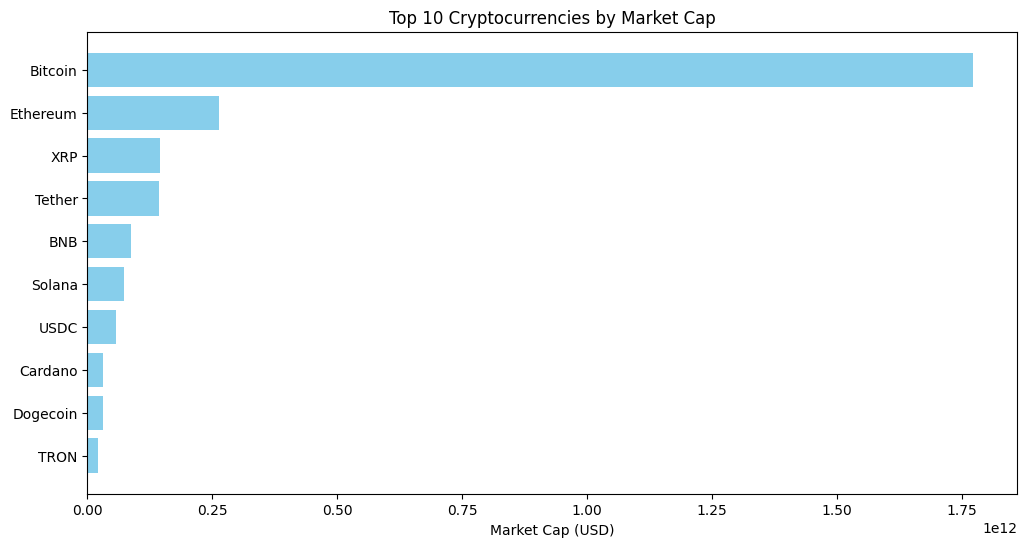

In [ ]:
import matplotlib.pyplot as plt

top_10 = df.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10['Coin'], top_10['Market Cap (USD)'], color='skyblue')
plt.xlabel('Market Cap (USD)')
plt.title('Top 10 Cryptocurrencies by Market Cap')
plt.gca().invert_yaxis()  # Show largest at the top
plt.show()

## Add Data Analysis

Which coins are up/down the most in 24h?

In [20]:
# Sort by 24h change
df_sorted = df.sort_values(by='24h Change (%)', ascending=False)
print("Top Gainers:")
display(df_sorted.head(5))

print("\nTop Losers:")
display(df_sorted.tail(5))

Top Gainers:


,Coin,Price (USD),Market Cap (USD),24h Change (%)
53,Ethena,0.443201,2308440706,11.40726
73,Movement,0.523011,1240310080,8.88560
14,Hedera,0.255902,10788813137,7.09280
48,VeChain,0.029822,2562407990,5.47421
42,Pepe,0.000007,3079948971,5.29200



Top Losers:


,Coin,Price (USD),Market Cap (USD),24h Change (%)
26,MANTRA,6.750000,6548591013,-4.85476
92,Lido DAO,1.120000,998108297,-4.95120
74,Story,4.980000,1230858089,-5.28533
65,Sonic (prev. FTM),0.531351,1672089469,-6.10363
38,Ondo,1.052000,3277141125,-8.61934


## Set Up Alerts

Add notifications for price thresholds

In [23]:
def check_price(coin_name, threshold):
    for index, row in df.iterrows():
        if row['Coin'] == coin_name:
            if row['Price (USD)'] < threshold:
                print(f"ALERT: {coin_name} dropped below ${threshold}!")
            else:
                print(f"{coin_name} is currently at ${row['Price (USD)']}")

# Example: Check if Bitcoin is below $50,000
check_price('Bitcoin', 80000)

Bitcoin is currently at $90674.0
